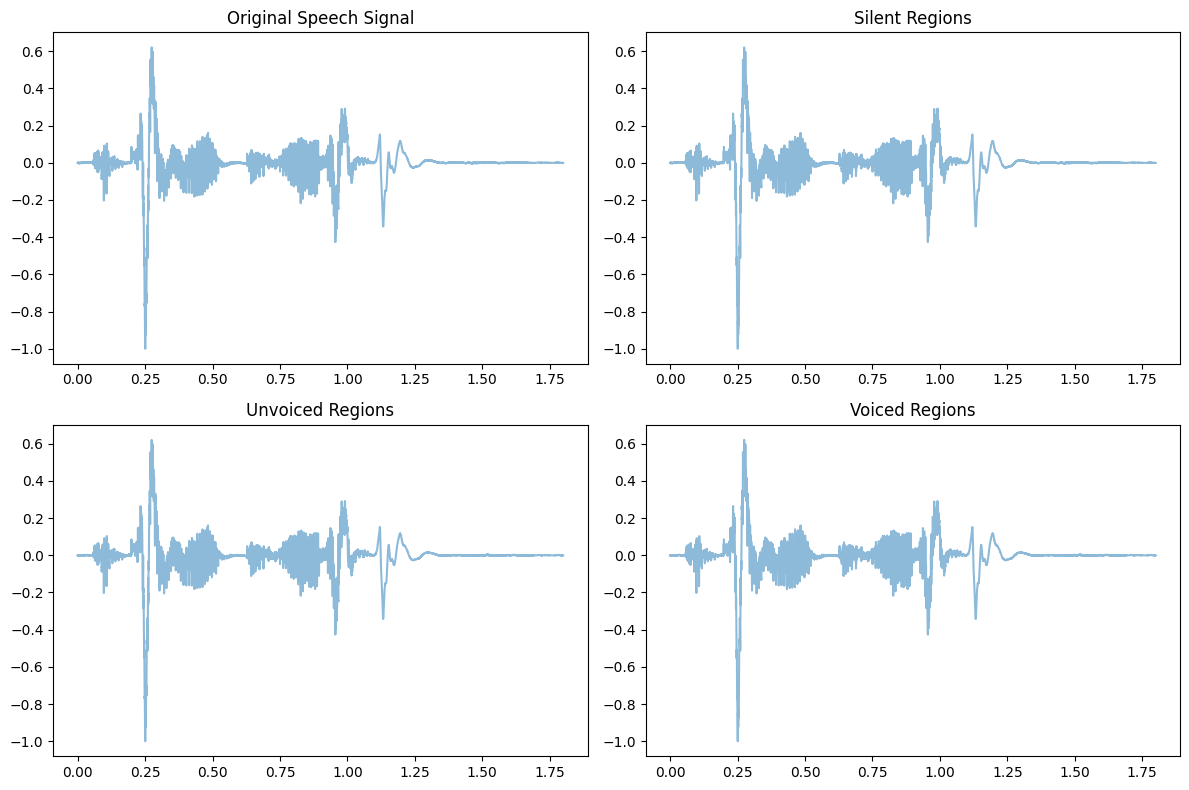

In [9]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio, display

def energy_based_vad(signal, sr):
    # Compute the short-term energy of the signal
    energy = librosa.feature.rms(y=signal, frame_length=2048, hop_length=512)[0]

    # Set a threshold to classify frames as voiced, unvoiced, or silent
    threshold = np.mean(energy) * 1.5  # Adjust multiplier as needed

    # Classify frames based on energy
    voiced_segments = []
    unvoiced_segments = []
    silent_segments = []

    segment_start = 0
    is_silent = True

    for i, e in enumerate(energy):
        if e > threshold:
            # Voiced segment or unvoiced segment
            if is_silent:
                segment_start = i
                is_silent = False
        else:
            # Silent segment
            if not is_silent:
                if e != 0:
                    if i - segment_start > 1:
                        if energy[i-1] > 0.0:
                            voiced_segments.append((segment_start, i))
                        else:
                            unvoiced_segments.append((segment_start, i))
                    else:
                        silent_segments.append((segment_start, i))
                else:
                    silent_segments.append((segment_start, i))
                is_silent = True

    # Add the last segment if it's not silent
    if not is_silent:
        if energy[-1] > 0.0:
            voiced_segments.append((segment_start, len(energy)))
        else:
            unvoiced_segments.append((segment_start, len(energy)))

    return voiced_segments, unvoiced_segments, silent_segments

def display_speech_regions(signal, sr):
    # Compute voiced, unvoiced, and silent regions
    voiced_segments, unvoiced_segments, silent_segments = energy_based_vad(signal, sr)

    # Plot the speech signal with voice, unvoiced, and silent regions
    plt.figure(figsize=(12, 8))

    # Plot original waveform
    plt.subplot(2, 2, 1)
    plt.plot(np.arange(len(signal)) / sr, signal, alpha=0.5)
    plt.title('Original Speech Signal')

    # Overlay silent regions in blue
    plt.subplot(2, 2, 2)
    plt.plot(np.arange(len(signal)) / sr, signal, alpha=0.5)
    for start, end in silent_segments:
        plt.axvspan(start / sr, end / sr, color='blue', alpha=0.3, lw=0)
    plt.title('Silent Regions')

    # Overlay unvoiced regions in red
    plt.subplot(2, 2, 3)
    plt.plot(np.arange(len(signal)) / sr, signal, alpha=0.5)
    for start, end in unvoiced_segments:
        plt.axvspan(start / sr, end / sr, color='red', alpha=0.3, lw=0)
    plt.title('Unvoiced Regions')

    # Overlay voice regions in green
    plt.subplot(2, 2, 4)
    plt.plot(np.arange(len(signal)) / sr, signal, alpha=0.5)
    for start, end in voiced_segments:
        plt.axvspan(start / sr, end / sr, color='green', alpha=0.3, lw=0)
    plt.title('Voiced Regions')

    plt.tight_layout()
    plt.show()

    # Play the audio
    display(Audio(signal, rate=sr))

# Load the audio file
audio_file = "speech.wav"
signal, sr = librosa.load(audio_file, sr=None)

# Cut a portion of the speech signal (for example, from 5 to 7 seconds)
cut_signal = signal[int(sr*5.2):sr*7]  # Adjust the duration as needed

# Display speech regions of the cut portion along with the original waveform
display_speech_regions(cut_signal, sr)
